<a href="https://colab.research.google.com/github/BeyzaYavas/WorldPopulationAnalysisAndMachineLearning/blob/main/WorldPopulationAnalysisAndMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Python ile makine öğrenmesi yardımıyla dünya nüfusu üzerine bir veri analizi"

**1)Veri Toplama - Veri Setini import etme**


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("world_population.csv")

**2) Veri Setine İlk Bakış - Veri Setinin Düzenlenmesi**

head() ve tail() fonksiyonlarını kullanarak veri setinin ilk 5 ve son 5 verilerini inceleyerek hangi değerlerden oluştuğunu görebiliriz.

In [3]:
df.head() #verisetinin ilk 5i

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
df.tail() #verisetinin son 5i

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


rename() fonksiyonunu kullanarak sütun isimlerini değiştirerek daha anlaşılır hale getirebiliriz.

In [5]:
df.rename(columns={"Rank": "Sıra", "CCA3":"Kod", "Country":"Ülke","Capital":"Başkent", "Continent": "Kıta", 
                   "2022 Population": "2022-Nüfus",
                   "2020 Population": "2020-Nüfus",
                   "2015 Population": "2015-Nüfus",
                   "2010 Population": "2010-Nüfus",
                   "2000 Population": "2000-Nüfus",
                   "1990 Population": "1990-Nüfus",
                   "1980 Population": "1980-Nüfus",
                   "1970 Population": "1970-Nüfus",
                   "Area (km²)": "Yüzölçüm",
                   "Density (per km²)": "NüfusYoğunluğu",
                   "Growth Rate": "BüyümeOranı",
                   "World Population Percentage": "DünyaNüfusYüzdesi",
                   }, inplace=True)

In [6]:
df.shape #veri setini oluşturan satır ve sütunların sayısı

(234, 17)

In [7]:
df.size #veri seti büyüklüğü

3978

Veri seti hakkında sütunların veri tipi gibi genel bilgilerini kontrol edebilmek için info() fonksiyonunu kullanıyoruz.

In [8]:
df.info() #veriler hakkında genel bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sıra               234 non-null    int64  
 1   Kod                234 non-null    object 
 2   Ülke               234 non-null    object 
 3   Başkent            234 non-null    object 
 4   Kıta               234 non-null    object 
 5   2022-Nüfus         234 non-null    int64  
 6   2020-Nüfus         234 non-null    int64  
 7   2015-Nüfus         234 non-null    int64  
 8   2010-Nüfus         234 non-null    int64  
 9   2000-Nüfus         234 non-null    int64  
 10  1990-Nüfus         234 non-null    int64  
 11  1980-Nüfus         234 non-null    int64  
 12  1970-Nüfus         234 non-null    int64  
 13  Yüzölçüm           234 non-null    int64  
 14  NüfusYoğunluğu     234 non-null    float64
 15  BüyümeOranı        234 non-null    float64
 16  DünyaNüfusYüzdesi  234 non

In [9]:
df.dtypes #verilerin tipleri

Sıra                   int64
Kod                   object
Ülke                  object
Başkent               object
Kıta                  object
2022-Nüfus             int64
2020-Nüfus             int64
2015-Nüfus             int64
2010-Nüfus             int64
2000-Nüfus             int64
1990-Nüfus             int64
1980-Nüfus             int64
1970-Nüfus             int64
Yüzölçüm               int64
NüfusYoğunluğu       float64
BüyümeOranı          float64
DünyaNüfusYüzdesi    float64
dtype: object

NüfusYoğunluğu, BüyümeOranı ve DünyaNüfusYüzdesi sütunlarında bulunan verilerin tipi float; Kod, Ülke, Başkent, Kıta sütunlarındakiler ise object, geri kalanların ise integer olduğunu görebiliyoruz. Ayrıca sütunlarda eksik veri bulunmadığını da görebiliriz.

describe() fonksiyonu veri setinin istatistiksel analiz değerlerini inceleyebilmemizi sağlar. Sütunlardaki minimum, maximum değerleri görebilir, verilerin standart sapması, çeyreklik değerleri ve ortalaması hakkında fikir sahibi olabiliriz.

In [10]:
df.describe().T  # veri setindeki değişkenler için istatistiksel analiz 

,count,mean,std,min,25%,50%,75%,max
Sıra,234.0,1.175000e+02,6.769417e+01,1.0000,59.250000,1.175000e+02,1.757500e+02,2.340000e+02
2022-Nüfus,234.0,3.407441e+07,1.367664e+08,510.0000,419738.500000,5.559944e+06,2.247650e+07,1.425887e+09
2020-Nüfus,234.0,3.350107e+07,1.355899e+08,520.0000,415284.500000,5.493074e+06,2.144798e+07,1.424930e+09
2015-Nüfus,234.0,3.172996e+07,1.304050e+08,564.0000,404676.000000,5.307400e+06,1.973085e+07,1.393715e+09
2010-Nüfus,234.0,2.984524e+07,1.242185e+08,596.0000,393149.000000,4.942770e+06,1.915957e+07,1.348191e+09
2000-Nüfus,234.0,2.626947e+07,1.116982e+08,651.0000,327242.000000,4.292907e+06,1.576230e+07,1.264099e+09
1990-Nüfus,234.0,2.271022e+07,9.783217e+07,700.0000,264115.750000,3.825410e+06,1.186923e+07,1.153704e+09
1980-Nüfus,234.0,1.898462e+07,8.178519e+07,733.0000,229614.250000,3.141146e+06,9.826054e+06,9.823725e+08
1970-Nüfus,234.0,1.578691e+07,6.779509e+07,752.0000,155997.000000,2.604830e+06,8.817329e+06,8.225344e+08
Yüzölçüm,234.0,5.814494e+05,1.761841e+06,1.0000,2650.000000,8.119950e+04,4.304258e+05,1.709824e+07


In [11]:
df.isnull().values.any()  #veri setinde herhangi bir değişkende eksik veri bulunmamaktadır

False

In [12]:
df.isnull().sum() #veri setindeki değişkenlerdeki eksik değerlerin toplamı

Sıra                 0
Kod                  0
Ülke                 0
Başkent              0
Kıta                 0
2022-Nüfus           0
2020-Nüfus           0
2015-Nüfus           0
2010-Nüfus           0
2000-Nüfus           0
1990-Nüfus           0
1980-Nüfus           0
1970-Nüfus           0
Yüzölçüm             0
NüfusYoğunluğu       0
BüyümeOranı          0
DünyaNüfusYüzdesi    0
dtype: int64

In [13]:
df.duplicated().sum() # tekrarlanan verilerin toplamı

0

**3) Keşifçi Veri Analizi ve Görselleştirme**

In [14]:
from matplotlib import pyplot as plt 

In [15]:
df["2022-Nüfus"].sum() #2022 yılındaki toplam dünya nüfusu

7973413042

In [16]:
#Yüzölçümü, NüfusYoğunluğu ve BüyümeOranının Kıtalara göre kırılımı 
data1=df.groupby("Kıta").agg({"Yüzölçüm": "sum","NüfusYoğunluğu":"sum","BüyümeOranı": "mean"}) 

In [17]:
data1.sort_values(ascending=0, by="Yüzölçüm") #Kıtaların yüzölçümüne göre sıralanması

,Yüzölçüm,NüfusYoğunluğu,BüyümeOranı
Kıta,,,
Asia,32138141,51251.2068,1.009384
Africa,30317963,7127.7158,1.021244
North America,24244178,10910.4703,1.004175
Europe,23010411,33166.2371,1.002256
South America,17833382,293.6077,1.007957
Oceania,8515081,3048.4905,1.007383


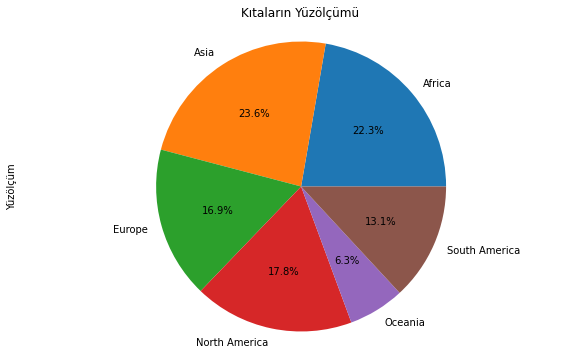

In [18]:
data1["Yüzölçüm"].plot(kind="pie", figsize=(10,6), autopct="%1.1f%%") 
plt.title("Kıtaların Yüzölçümü")
plt.axis("equal")
plt.show()

In [19]:
data1.sort_values(ascending=0, by="NüfusYoğunluğu")

,Yüzölçüm,NüfusYoğunluğu,BüyümeOranı
Kıta,,,
Asia,32138141,51251.2068,1.009384
Europe,23010411,33166.2371,1.002256
North America,24244178,10910.4703,1.004175
Africa,30317963,7127.7158,1.021244
Oceania,8515081,3048.4905,1.007383
South America,17833382,293.6077,1.007957


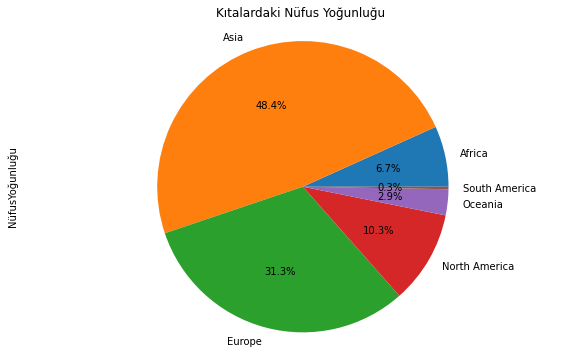

In [20]:
data1["NüfusYoğunluğu"].plot(kind="pie", figsize=(10,6), autopct="%1.1f%%") 
plt.title("Kıtalardaki Nüfus Yoğunluğu")
plt.axis("equal")
plt.show()

In [21]:
data1.sort_values(ascending=0, by="BüyümeOranı")

,Yüzölçüm,NüfusYoğunluğu,BüyümeOranı
Kıta,,,
Africa,30317963,7127.7158,1.021244
Asia,32138141,51251.2068,1.009384
South America,17833382,293.6077,1.007957
Oceania,8515081,3048.4905,1.007383
North America,24244178,10910.4703,1.004175
Europe,23010411,33166.2371,1.002256


  

*   Toplam dünya nüfusu 2022 yılında 7.973.413.042 ‘dir.
*   Kıtalara göre Yüzölçüm ve NüfusYoğunluğu’nun toplamı ve BüyümeOranı’nın ortalamasını listeleyebiliriz. Buna göre Asya kıtasının yüz ölçümü ve nüfus yoğunluğu diğer kıtalardan fazladır. Büyüme oranı en fazla olan kıta ise Afrika kıtasıdır.

*   Pasta grafikleri ile kıtaların yüzölçüm ve nüfus yoğunluklarının karşılaştırmasını görsel olarak rahatça yapabiliriz. Dünya nüfusunun büyük çoğunluğu yüzölçümü olarak en büyük kıta olan Asya’da toplanmıştır.
*   Nüfus yoğunluğu en az olan kıta Güney Amerika’dır.

*   Okyanusya kıtasının nüfus yoğunluğunun Güney Amerika’dan fazla olmasına rağmen Güney Amerika’nın yüzölçümünün Okyanusya kıtasına göre daha fazla olduğu görülmektedir.
*   Avrupa kıtası yüzölçümü olarak 4.sırada olmasına rağmen nüfus yoğunluğu olarak 2.sıradadır.







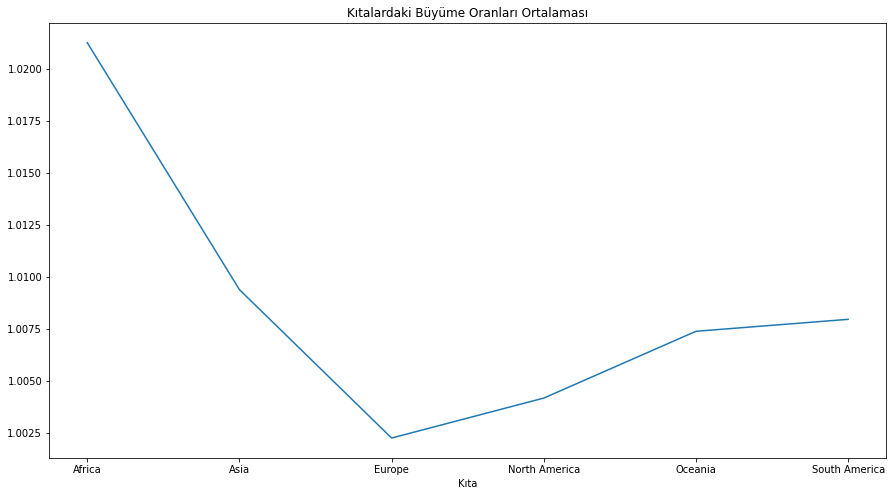

In [22]:
data1["BüyümeOranı"].plot(kind="line", figsize=(15,8)) 
plt.title("Kıtalardaki Büyüme Oranları Ortalaması")
plt.show()



*   Büyüme oranı ortalama grafiğini incelediğimizde Avrupa kıtasının büyüme oranının diğer kıtalarla kıyaslandığında oldukça düşük olduğunu görüyoruz.
*   Büyüme oranı en fazla olan kıta Afrika kıtasıdır ve onu Asya kıtası takip etmektedir.



In [23]:
data2=df.groupby("Kıta").agg({"2022-Nüfus":"sum",
                              "2020-Nüfus":"sum",
                              "2015-Nüfus":"sum",
                              "2010-Nüfus":"sum",
                              "2000-Nüfus":"sum",
                              "1990-Nüfus":"sum",
                              "1980-Nüfus":"sum", 
                              "1970-Nüfus":"sum"})
data2

,2022-Nüfus,2020-Nüfus,2015-Nüfus,2010-Nüfus,2000-Nüfus,1990-Nüfus,1980-Nüfus,1970-Nüfus
Kıta,,,,,,,,
Africa,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348
Asia,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290
Europe,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991
North America,600296136,594236593,570383850,542720651,486069584,421266425,368293361,315434606
Oceania,45038554,43933426,40403283,37102764,31222778,26743822,22920240,19480270
South America,436816608,431530043,413134396,393078250,349634282,297146415,241789006,192947156


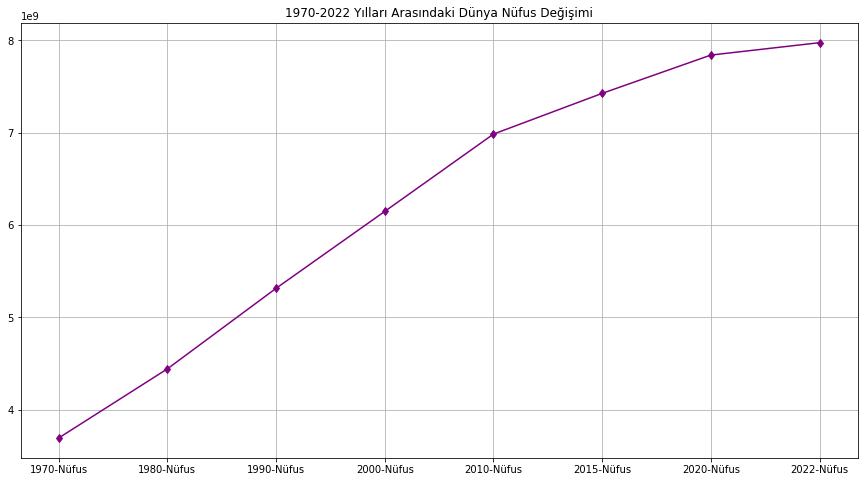

In [24]:
plt.subplots(figsize=(15,8))
result = data2.iloc[:,0:8].sum()[::-1]
plt.plot(result.index, result.values,color="purple", marker="d")
plt.grid()
plt.title("1970-2022 Yılları Arasındaki Dünya Nüfus Değişimi")
plt.show()



*   1970-2022 Yılları Arasındaki Dünya Nüfus Değişimi çizgi grafiği ile dünya nüfusunun değişimini 1970 yılından 2022 yılına kadar 10 yıllık aralıklarla gözlemleyebiliriz.
*   Nüfus 1970 yılından 2010 yılına kadarki süreçte neredeyse sabit bir hızla artış gösterirken 2010 yılından sonra artış hızının biraz azaldığını söyleyebiliriz.

*   2022 yılı itibariyle nüfus 8 milyara yaklaşmıştır.





In [25]:
df_new = pd.DataFrame({"Kıtalar":["Africa","Asia","Europe","North America", "Ocenia", "South America"],
                       "2022":[1426730932, 4721383274, 743147538,600296136,45038554,436816608],
                       "2000":[818946032,	3735089604,	726093423,	486069584,	31222778,	349634282],
                       "1970":[365444348, 2144906290, 655923991, 315434606, 19480270,	192947156],
                       })
df_new

,Kıtalar,2022,2000,1970
0,Africa,1426730932,818946032,365444348
1,Asia,4721383274,3735089604,2144906290
2,Europe,743147538,726093423,655923991
3,North America,600296136,486069584,315434606
4,Ocenia,45038554,31222778,19480270
5,South America,436816608,349634282,192947156


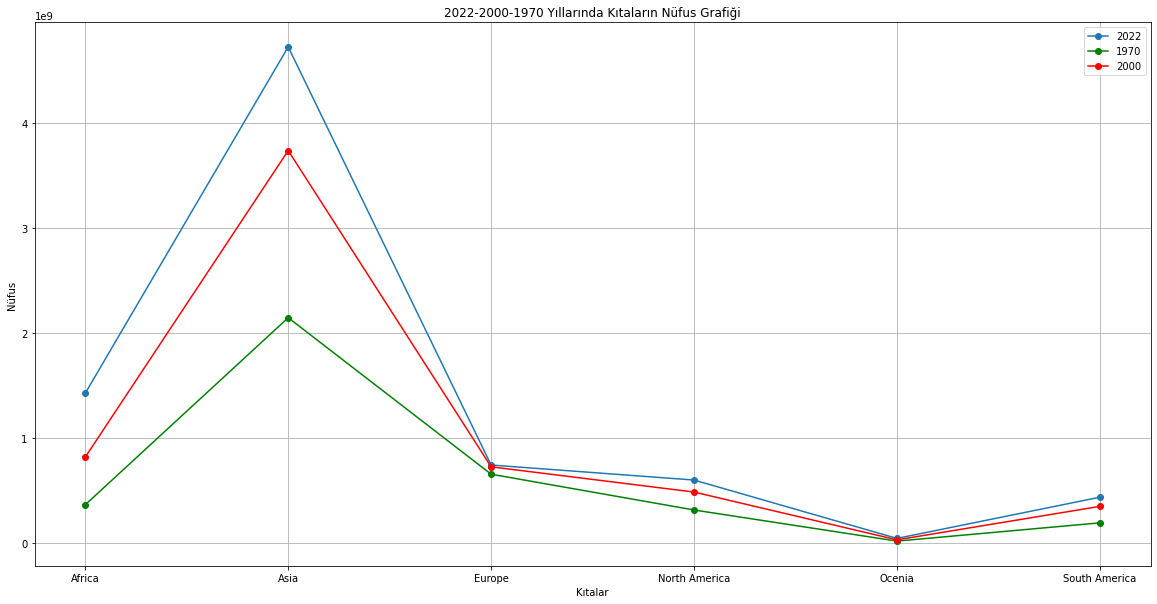

In [26]:
#kıtaların yıllara göre nüfus çizgi grafiği

plt.subplots(figsize=(20,10))
plt.plot(df_new["Kıtalar"], df_new["2022"], label="2022", marker="o")

plt.plot(df_new["Kıtalar"], df_new["1970"], label="1970", marker="o", color="green")

plt.plot(df_new["Kıtalar"], df_new["2000"], label="2000", marker="o", color="red")

plt.title('2022-2000-1970 Yıllarında Kıtaların Nüfus Grafiği')

plt.xlabel("Kıtalar")
plt.ylabel("Nüfus")
plt.grid()
plt.legend()
plt.show()



*   Kıtaların 2022, 2000 ve 1970 yıllarında nüfus karşılaştırmasını yapabileceğimiz bu çizgi grafiğinde Asya kıtasındaki nüfusun bu yıllar arasında en çok değişim gösterdiğini söyleyebiliriz. Hatta en büyük değişimin 1970-2000 yılları arasında yaşandığı görülebilir.
*   Okyanusya kıtasına bakıldığında bu yıllar arasında 3 yıla ait grafikler çakışmaktadır. Buna göre nüfus değişiminin fazla olmadığını söyleyebiliriz ve Okyanusya kıtasının nüfus değişimi diğer kıtalarla kıyaslandığında en azdır.



In [27]:
corr_data = [col for col in df.columns if ((col != "Sıra") & (df[col].dtype in [int,float])) ]
corr_data

['2022-Nüfus',
 '2020-Nüfus',
 '2015-Nüfus',
 '2010-Nüfus',
 '2000-Nüfus',
 '1990-Nüfus',
 '1980-Nüfus',
 '1970-Nüfus',
 'Yüzölçüm',
 'NüfusYoğunluğu',
 'BüyümeOranı',
 'DünyaNüfusYüzdesi']

In [28]:
corr_analysis = df[corr_data].corr()
corr_analysis 

,2022-Nüfus,2020-Nüfus,2015-Nüfus,2010-Nüfus,2000-Nüfus,1990-Nüfus,1980-Nüfus,1970-Nüfus,Yüzölçüm,NüfusYoğunluğu,BüyümeOranı,DünyaNüfusYüzdesi
2022-Nüfus,1.000000,0.999946,0.999490,0.998629,0.994605,0.987228,0.980285,0.973162,0.453411,-0.027618,-0.020863,0.999999
2020-Nüfus,0.999946,1.000000,0.999763,0.999105,0.995583,0.988724,0.982121,0.975254,0.454993,-0.027358,-0.025116,0.999944
2015-Nüfus,0.999490,0.999763,1.000000,0.999783,0.997340,0.991594,0.985724,0.979414,0.458240,-0.026857,-0.032154,0.999487
2010-Nüfus,0.998629,0.999105,0.999783,1.000000,0.998593,0.993929,0.988786,0.983042,0.461936,-0.026505,-0.037983,0.998626
2000-Nüfus,0.994605,0.995583,0.997340,0.998593,1.000000,0.998336,0.995160,0.990956,0.473933,-0.026139,-0.050515,0.994598
1990-Nüfus,0.987228,0.988724,0.991594,0.993929,0.998336,1.000000,0.999042,0.996602,0.486764,-0.026224,-0.062397,0.987218
1980-Nüfus,0.980285,0.982121,0.985724,0.988786,0.995160,0.999042,1.000000,0.999194,0.498166,-0.026587,-0.072349,0.980273
1970-Nüfus,0.973162,0.975254,0.979414,0.983042,0.990956,0.996602,0.999194,1.000000,0.509940,-0.026881,-0.081313,0.973150
Yüzölçüm,0.453411,0.454993,0.458240,0.461936,0.473933,0.486764,0.498166,0.509940,1.000000,-0.063128,-0.013970,0.453284
NüfusYoğunluğu,-0.027618,-0.027358,-0.026857,-0.026505,-0.026139,-0.026224,-0.026587,-0.026881,-0.063128,1.000000,-0.069753,-0.027646


Veri setindeki verilerin birbirleriyle olan ilişkisini inceleyebilmek için korelasyon analizi yapılması gereklidir. Korelasyon analizinde değerler -1 ile 1 arasındadır. Değer 1 veya -1’e yaklaştıkça ilişkinin kuvvetlendiğini, 0’a yaklaştıkça ilişkinin zayıfladığını anlayabiliriz. (-) değerler negatif korelasyona (+) değerler ise pozitif korelasyon varlığına işaret eder.

In [29]:
import seaborn as sns

Seaborn kütüphanesinde bulunan heatmap ile tablodaki verileri ilişkilerin şiddetlerine göre renklendirerek bu tabloyu daha anlamlı hale getirebiliriz.

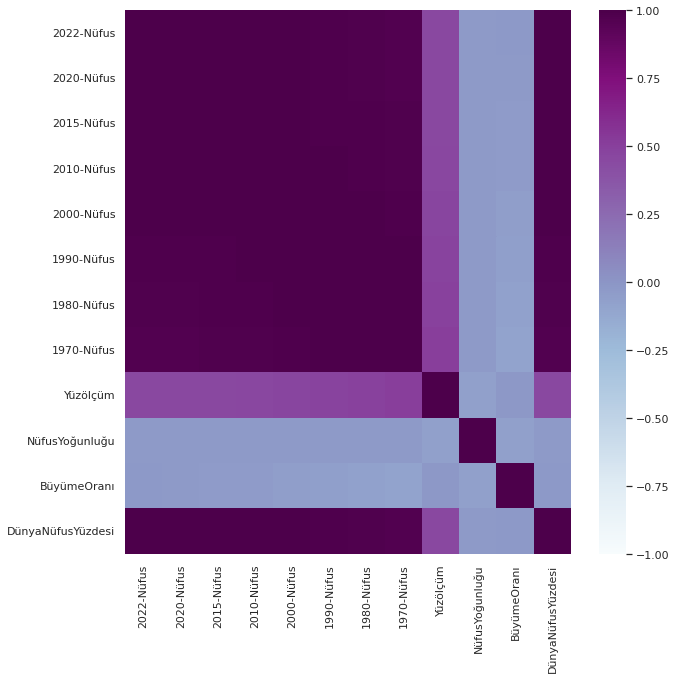

In [30]:
sns.set(rc={"figure.figsize":(10,10)})
sns.heatmap(corr_analysis, cmap="BuPu", vmin=-1, vmax=1)
plt.show()

Veri seti seçerken planımız BüyümeOranı ile nüfus tahmini yapmaktı ancak burada BüyümeOranı ile yıllar arasındaki ilişki şiddetinin oldukça düşük olduğunu, Yüzölçümü ile yıllar arasında ise BüyümeOranı'na göre daha fazla korelasyon olduğunu gözlemliyoruz. O halde Yüzölçüm ile yıllar üzerine bir makine öğrenmesi modeli oluşturulabilir. Bunun için saçılma grafiklerini (scatter plot) kullanarak hangi değişkenler arasında doğrusal bir ilişki oluşabilir inceleyelim.

Öncelikle Yüzölçüm ile NüfusYoğunluğu değerleri arasındaki ilişkiyi gözlemlersek:

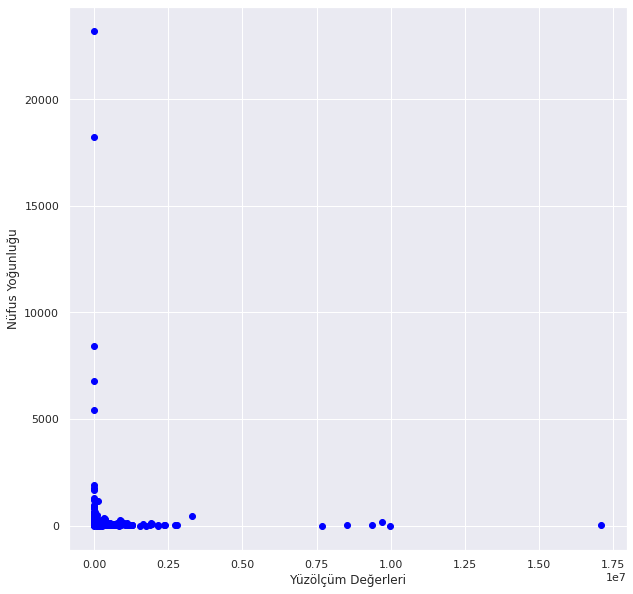

In [31]:
plt.scatter(x=df["Yüzölçüm"], y=df["NüfusYoğunluğu"], color="blue")
plt.xlabel("Yüzölçüm Değerleri")
plt.ylabel("Nüfus Yoğunluğu")
plt.show()

Bu değerler arasında herhangi bir doğrusal ilişki bulunmadığını grafikten anlayabiliyoruz. 
 
 Aynı şekilde Yüzölçüm ve DünyaNüfusYüzdesi arasındaki ilişkiyi incelersek:

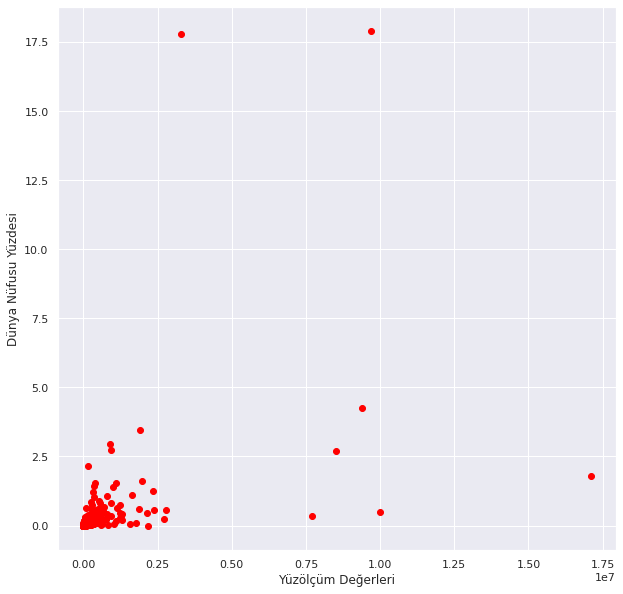

In [32]:
plt.scatter(x=df["Yüzölçüm"], y=df["DünyaNüfusYüzdesi"], color="red")
plt.xlabel("Yüzölçüm Değerleri")
plt.ylabel("Dünya Nüfusu Yüzdesi")
plt.show()

Aynı şekilde Yüzölçüm ve BüyümeOranı arasındaki ilişkiyi incelersek:

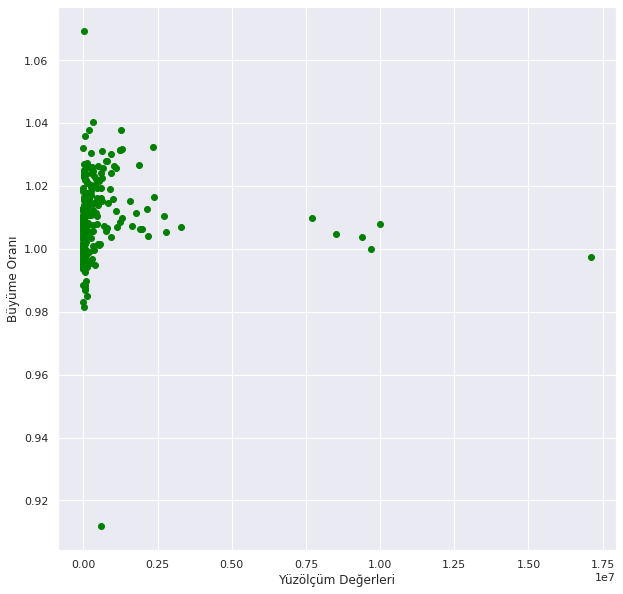

In [33]:
plt.scatter(x=df["Yüzölçüm"], y=df["BüyümeOranı"], color="green")
plt.xlabel("Yüzölçüm Değerleri")
plt.ylabel("Büyüme Oranı")
plt.show()

Aynı şekilde BüyümeOranı ve 2022-Nüfus arasındaki ilişkiyi incelersek:

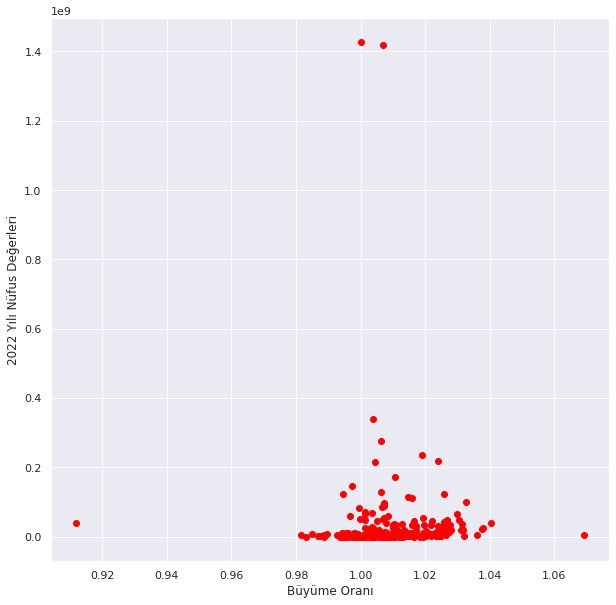

In [34]:
plt.scatter(x=df["BüyümeOranı"], y=df["2022-Nüfus"], color="red")
plt.xlabel("Büyüme Oranı")
plt.ylabel("2022 Yılı Nüfus Değerleri")
plt.show()

Grafiklere bakıldığında doğrusal bir ilişkiye en yakın olabilecek ilişki Yüzölçüm ve DünyaNüfusYoğunluğu arasında olduğu görülmektedir.

   Makine öğrenmesi sürecini bu iki değişken üzerinde ilerletip sonuçları inceleyebiliriz.

**4) Model Kurulması**

In [35]:
import sklearn.model_selection
import numpy as np 

Lineer regresyon için x değişkeni ve y değişkenine Yüzölçüm ile DünyaNüfusYoğunluğu‘nu atıyoruz.

In [37]:
#Bağımlı ve bağımsız değişkenlerin seçimi
x=df["Yüzölçüm"]
y=df["DünyaNüfusYüzdesi"]

Modelin, verilerin belli bir kısmıyla
öğrenmesini sağlayıp kalanlarıyla tahmin yapabilmesi için veri setindeki verileri test ve train olarak belli bir oranda (train oranı = 0,8) ayırıyoruz.

In [38]:
x_train, x_test, y_train, y_test =  sklearn.model_selection.train_test_split(x,y, train_size=0.8)

train ve test verilerini numpy arraylerine dönüştürerek yöntemin uygulanabilmesi için uygun formata getirilmesini sağlıyoruz.

In [39]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [40]:
x_train.shape

(187,)

In [41]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [42]:
x_train.shape

(187, 1)

Bu süreçlerle beraber veriler istenilen formatta olduğu için seçilen yöntem olan lineer regresyon ile model kurulabilir.    
Model kurulurken train yani eğitim için ayrılan veriler kullanılmaktadır.

In [44]:
import sklearn.linear_model

In [45]:
lin_model= sklearn.linear_model.LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

Modelimiz hazır artık modeli test edip metrikleri inceleyerek modelin nasıl çalıştığını analiz edebiliriz.

**5) Modelin Test Edilmesi ve Metrikler**

Model başarıyla kurulduktan sonra daha önce test ve train olarak ayrılan veri setinin train kısmı modelin eğitilmesinde kullanılmıştı.   
 Şimdi de test verilerini modelin test edilmesinde test verileri kullanılacaktır.

In [47]:
import sklearn.metrics

In [48]:
y_predicts = lin_model.predict(x_test)

y_predicts değerleri modelin tahmin değerlerini vermektedir. Bu değerleri inceleyebiliriz.

In [49]:
print(y_predicts)

[[0.16706332]
 [0.16703489]
 [0.16705414]
 [0.28406149]
 [0.20352172]
 [0.2072641 ]
 [0.21970718]
 [0.16699903]
 [0.18281489]
 [0.16747754]
 [0.17585152]
 [0.6500023 ]
 [0.25302988]
 [0.17497628]
 [0.17912194]
 [0.16718711]
 [0.27131791]
 [0.2712558 ]
 [0.57103804]
 [0.16717836]
 [0.16718492]
 [0.20486279]
 [0.20147952]
 [0.16702396]
 [0.27322803]
 [0.17302549]
 [0.17103052]
 [0.16731876]
 [0.17179159]
 [0.28528577]
 [0.20366913]
 [0.61780984]
 [0.31500999]
 [0.19836306]
 [0.25778789]
 [0.16699728]
 [1.10725336]
 [0.16759345]
 [0.29878779]
 [0.16713462]
 [0.17349001]
 [0.55273033]
 [0.3914216 ]
 [0.19173823]
 [0.1977214 ]
 [0.1796232 ]
 [0.46291773]]


In [50]:
print(y_test)

[[0.  ]
 [0.  ]
 [0.  ]
 [0.03]
 [0.  ]
 [0.13]
 [0.33]
 [0.  ]
 [0.3 ]
 [0.  ]
 [0.03]
 [1.55]
 [0.22]
 [0.01]
 [0.15]
 [0.  ]
 [0.42]
 [0.25]
 [2.74]
 [0.  ]
 [0.  ]
 [0.13]
 [0.13]
 [0.  ]
 [0.85]
 [0.01]
 [0.02]
 [0.02]
 [0.04]
 [0.07]
 [0.11]
 [0.06]
 [0.07]
 [0.11]
 [0.12]
 [0.01]
 [0.46]
 [0.  ]
 [0.74]
 [0.  ]
 [0.02]
 [2.96]
 [0.9 ]
 [0.05]
 [0.06]
 [0.01]
 [0.68]]


Modelin tahmini değerini ve gerçek değerleri karşılaştırabiliriz.

In [51]:
for i in range(len(x_test)):
  print(f"Gerçek Değer: {y_test[i]} vs Model Tahmini: {y_predicts[i]}")

Gerçek Değer: [0.] vs Model Tahmini: [0.16706332]
Gerçek Değer: [0.] vs Model Tahmini: [0.16703489]
Gerçek Değer: [0.] vs Model Tahmini: [0.16705414]
Gerçek Değer: [0.03] vs Model Tahmini: [0.28406149]
Gerçek Değer: [0.] vs Model Tahmini: [0.20352172]
Gerçek Değer: [0.13] vs Model Tahmini: [0.2072641]
Gerçek Değer: [0.33] vs Model Tahmini: [0.21970718]
Gerçek Değer: [0.] vs Model Tahmini: [0.16699903]
Gerçek Değer: [0.3] vs Model Tahmini: [0.18281489]
Gerçek Değer: [0.] vs Model Tahmini: [0.16747754]
Gerçek Değer: [0.03] vs Model Tahmini: [0.17585152]
Gerçek Değer: [1.55] vs Model Tahmini: [0.6500023]
Gerçek Değer: [0.22] vs Model Tahmini: [0.25302988]
Gerçek Değer: [0.01] vs Model Tahmini: [0.17497628]
Gerçek Değer: [0.15] vs Model Tahmini: [0.17912194]
Gerçek Değer: [0.] vs Model Tahmini: [0.16718711]
Gerçek Değer: [0.42] vs Model Tahmini: [0.27131791]
Gerçek Değer: [0.25] vs Model Tahmini: [0.2712558]
Gerçek Değer: [2.74] vs Model Tahmini: [0.57103804]
Gerçek Değer: [0.] vs Model Ta

Modelin bazı değerlerde gerçek değerlere oldukça yakın tahminler yapabilirken bazı değerlerde daha uzak tahminler yaptığını gözlemleyebiliriz.
     Şimdi ise modelin metriklerini kontrol edelim.

In [52]:
#mean absolute error
mae = sklearn.metrics.mean_absolute_error(y_test, y_predicts)
#mean squarred error
mse = sklearn.metrics.mean_squared_error(y_test,y_predicts)
#r2 score
r2 = sklearn.metrics.r2_score(y_test, y_predicts)

In [53]:
print(f"MAE: {mae} \n MSE: {mse} \n R2: {r2} ")

MAE: 0.29464481011076243 
 MSE: 0.2925093642079353 
 R2: 0.23632123453169118 


**5) Sonuç**

MSE(ortalama kare hata), bir regresyon eğrisinin bir dizi noktaya ne kadar yakın olduğunu söyler. MSE, bir makine öğrenmesi modelinin, tahminleyicinin performansını ölçer, her zaman pozitif değerlidir.MSE değeri sıfıra yakın tahminleyicilerin daha iyi bir performans gösterdiği söylenebilir     
 MSE değeri 2.2101934927642244 olarak bulunmuştur. Sıfıra çok yakın bir değer olmamakla beraber veri setine yeni veriler eklenerek modelin gelişmesi sağlanarak daha iyi tahmin yapılması sağlanırsa sıfıra çok daha yakın bir sonuca ulaşılması mümkündür.

MAE(ortalama mutlak hata), model tahmini ile hedef değişken arasındaki mutlak farkın ortasını vermektedir. Bu değerin sıfıra yakın olması tahmin yeteneğinin iyi olduğunu gösterir.         
MAE değerinin 0.486231646964556 olarak bulunması ile model tahmin yeteneğinin iyi olduğu söylenebilir.

R kare, hedef varyans ve tahmin hatasına ilişkin fark arasındaki hedef varyans ile farkın oranıdır. Modeli oluşturmak için kullanılan verilerin regresyona ne kadar uygun olduğunu söyleyebilir. R kare değeri ne kadar yüksekse modelin gerçek değerlerle yakınlığı o kadar yüksektir.  
 R kare değeri olarak -3.2955171384708075 sayısına ulaşılmıştır ve modelin gerçek değerlere yakınlığının çok yüksek olmadığını anlaşılabilir.

Sonuç olarak bu verilen bilgilerle bulunan metrik değerleri gözlemlendiğinde regresyon modelinin seçilen bağımlı ve bağımsız değişkenler için çok uygun sonuçlar üretmediği söylenebilir.